In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
savedir = "saved_models/clean_persistent_selfprobs/"

In [3]:
training_samples = np.load(savedir + "training_samples.npy")
final_samples = np.load(savedir + "final_samples.npy").item()
variables = np.load(savedir + "variables.npy")
data_seeds = np.load(savedir + "sample_seeds.npy")
training_seeds = np.load(savedir + "training_seeds.npy")
randseeds = np.load(savedir + "randseed.npy")

In [4]:
data_seeds = np.reshape(data_seeds,(-1, 28,28))
randseeds = np.reshape(randseeds,(-1, 28,28))
nseed = data_seeds.shape[0]

### Look at the trained weights

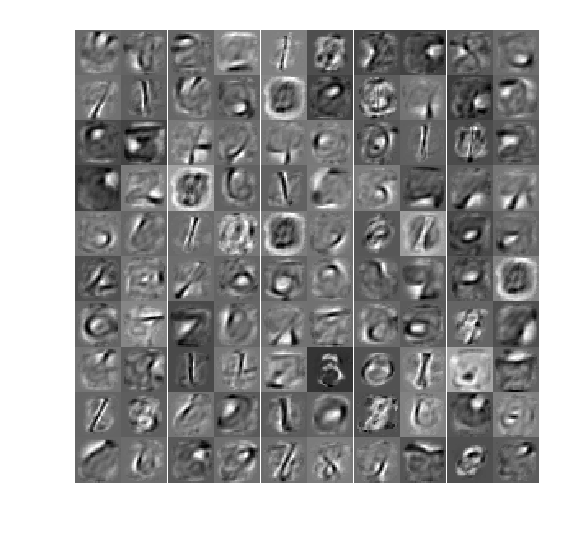

In [5]:
s=10
fig, axes = plt.subplots(s,s, figsize=(3,3),dpi=200)
for ii in range(s):
    for jj in range(s):
        ax = axes[ii,jj]
        w=np.reshape(variables[-1]['weights'][:,ii*s + jj], (28,28))
        ax.imshow(w, cmap='binary')
        ax.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(savedir+"weights_examples.png")

## Look at samples produced by the trained model, when seeded by the dataset

In [6]:
samples_dataseed = final_samples['dataseed']
numsamples = len(samples_dataseed)
samples_randseed = final_samples['randseed']


In [7]:
snapshots_dataseed = np.reshape(np.asarray([samples_dataseed[k]['samples'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))
probs_dataseed = np.reshape(np.asarray([samples_dataseed[k]['probs'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))
snapshots_randseed = np.reshape(np.asarray([samples_randseed[k]['samples'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))
probs_randseed = np.reshape(np.asarray([samples_randseed[k]['probs'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))


In [8]:
def do_sampling_plot(images, seeds, numseed=nseed, numtoplot=10, dpi=200):
    fig, axes = plt.subplots(numseed, numtoplot,figsize=(3,3*(numseed/numtoplot)),dpi=200)
    for ii in range(numtoplot):
        for jj in range(numseed):
            ax = axes[jj,ii]
            if ii==0:
                image = seeds[jj,...]
            else:
                image=images[ii-1,jj,...]
            ax.imshow(image, cmap='binary')
            ax.set_axis_off()
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, ax

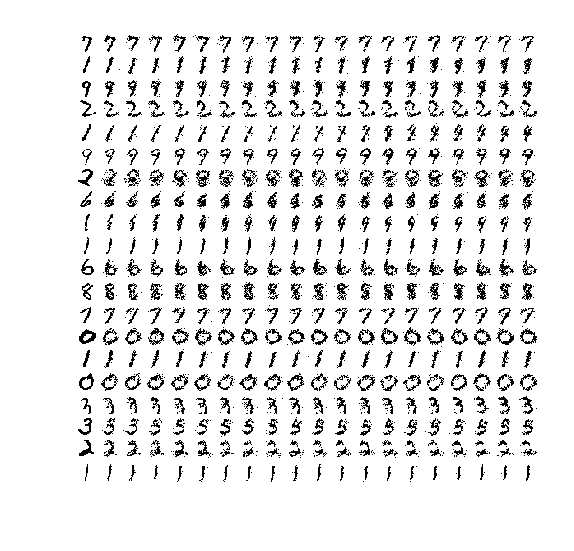

In [9]:
fig, ax = do_sampling_plot(snapshots_dataseed, data_seeds, numseed=20, numtoplot=20)
fig.savefig(savedir+"trained_samples_dataseed.png")

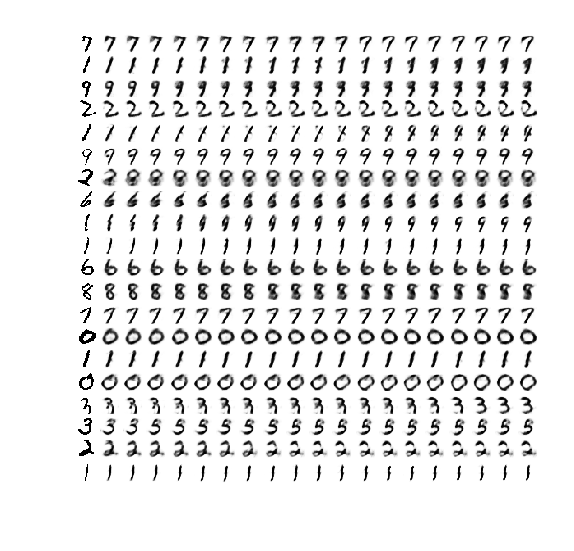

In [10]:
fig, ax = do_sampling_plot(probs_dataseed, data_seeds, numseed=20, numtoplot=20)
fig.savefig(savedir+"trained_probs_dataseed.png")

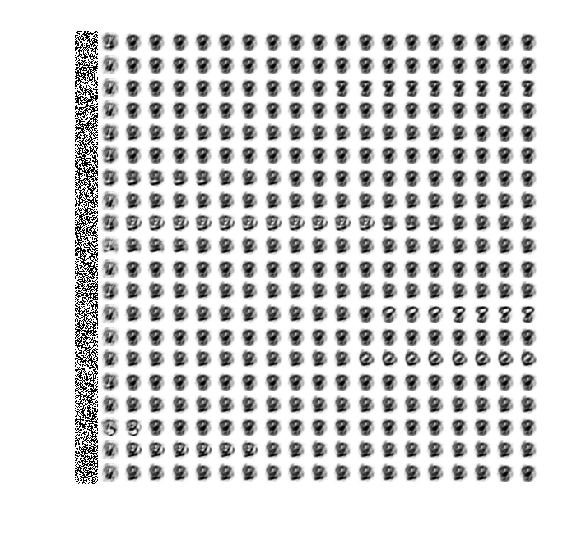

In [11]:
fig, ax = do_sampling_plot(probs_randseed, randseeds,numseed=20,numtoplot=20, dpi=300)
fig.savefig(savedir+"trained_probs_randseed.png")

## Look at evolution of persistent state

In [12]:
batch_size = training_samples.shape[1]

In [13]:
training_samples = np.reshape(training_samples, (-1, batch_size, 28, 28))

In [14]:
def do_persistent_plot(numseed=nseed, numtoplot=10, dpi=200):
    fig, axes = plt.subplots(numseed, numtoplot,figsize=(3,3*(numseed/numtoplot)),dpi=200)
    for ii in range(numtoplot):
        for jj in range(numseed):
            ax = axes[jj,ii]
            image=training_samples[ii,jj,...]
            ax.imshow(image, cmap='binary')
            ax.set_axis_off()
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, ax

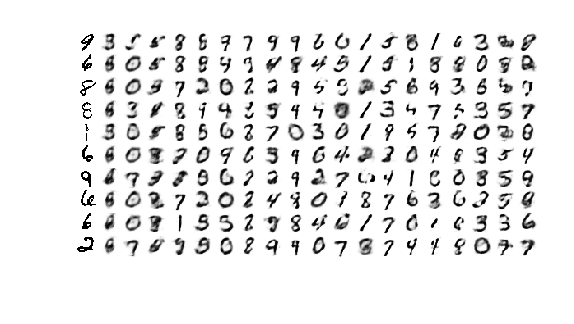

In [15]:
fig, ax = do_persistent_plot(numseed=10,numtoplot=20)
fig.savefig("persistent_states.png")